## 1.0 Imports

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import warnings

In [2]:
warnings.filterwarnings('ignore')

**Organisation**:

* Data exploration - univariate and bivariate, qualitative and quantitative
* Feature engineering -
    * Missing Data
    * Tranforming data (eg: ws_diff)
    * Label encoding
    * Box-Cox/Log Transformation of skewed features
    * Getting dummy variables

## 1.1 Reading and merging the data

In [3]:
bbref = pd.read_csv('data/bb_ref.csv')
tt = pd.read_csv('data/tankathon.csv')

In [4]:
vorp = bbref[['Player','VORP']].groupby('Player',as_index=False).max().sort_values('VORP', ascending=False)

In [5]:
df = tt.merge(vorp, left_on = 'name', right_on='Player')

In [6]:
df

,name,position,pick,height_cm,wingspan_cm,weight_lb,c_year,age,games,mp,...,TS,usg,o_bpm,d_bpm,3p%,ft%,3pa,fta,Player,VORP
0,Kyrie Irving,PG,1,191.8,193.0,191,Freshman,19.2,11.0,27.5,...,0.697,26.4,10.8,3.5,0.462,0.901,0.375,0.683,Kyrie Irving,5.1
1,Derrick Williams,PF,2,205.1,217.2,248,Sophomore,20.1,38.0,30.0,...,0.690,28.9,9.2,2.6,0.568,0.746,0.195,0.871,Derrick Williams,0.8
2,Enes Kanter,C,3,211.5,217.2,259,Freshman,19.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enes Kanter,1.9
3,Tristan Thompson,PF,4,205.1,216.5,227,Freshman,20.3,36.0,30.7,...,0.536,22.4,3.9,7.2,NaN,0.487,0.000,0.829,Tristan Thompson,1.2
4,Bismack Biyombo,C,7,205.7,NaN,243,International,18.8,14.0,17.1,...,0.560,NaN,NaN,NaN,NaN,0.553,0.000,0.810,Bismack Biyombo,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,Ray Spalding,PF,56,208.9,225.4,215,Junior,21.3,36.0,27.6,...,0.568,22.9,3.5,6.5,0.263,0.640,0.056,0.338,Ray Spalding,0.0
395,Kevin Hervey,PF,57,202.6,222.2,212,Senior,21.9,33.0,32.2,...,0.553,31.0,3.3,0.7,0.339,0.807,0.417,0.257,Kevin Hervey,0.0
396,Thomas Welsh,C,58,213.4,NaN,255,Senior,22.4,33.0,33.2,...,0.577,17.7,3.5,2.5,0.402,0.828,0.335,0.174,Thomas Welsh,0.0
397,George King,SF,59,198.1,212.1,219,Senior,24.4,32.0,28.5,...,0.574,23.3,2.2,2.1,0.395,0.782,0.492,0.273,George King,0.0


In [7]:
df_new = tt[~tt['name'].isin(df['name'])]
bb_new = vorp[~vorp['Player'].isin(df['Player'])]
df_new

,name,position,pick,height_cm,wingspan_cm,weight_lb,c_year,age,games,mp,...,steals,blocks,TS,usg,o_bpm,d_bpm,3p%,ft%,3pa,fta
4,Jonas Valanciunas,C,5,213.4,NaN,231,International,19.1,15.0,15.4,...,0.5,1.6,0.743,NaN,NaN,NaN,NaN,0.885,0.000,0.400
5,Jan Vesely,PF,6,210.8,NaN,239,International,21.2,15.0,27.0,...,1.7,1.2,0.560,NaN,NaN,NaN,0.357,0.444,0.255,0.491
19,Donatas Motiejunas,PF,20,213.4,NaN,222,International,20.7,46.0,26.3,...,1.5,0.7,0.565,NaN,NaN,NaN,0.328,0.686,0.167,0.524
41,Davis Bertans,SF,42,208.3,NaN,210,International,18.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Jon Diebler,SG,51,199.4,198.1,197,Senior,22.9,37.0,35.7,...,1.0,0.1,0.723,14.4,9.8,2.7,0.502,0.810,0.794,0.276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,Troy Brown,SG,15,200.0,208.9,208,Freshman,18.9,35.0,31.2,...,1.8,0.2,0.532,21.0,1.3,2.9,0.291,0.743,0.342,0.326
462,Justin Jackson (UMD),SF,43,200.0,221.0,229,Sophomore,21.3,11.0,29.2,...,1.0,1.0,0.470,24.1,-0.5,3.7,0.250,0.828,0.396,0.287
463,Issuf Sanon,PG,44,193.0,NaN,190,International,18.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,Tony Carr,PG,51,194.3,203.8,198,Sophomore,20.7,37.0,35.4,...,0.8,0.3,0.527,29.9,5.5,1.1,0.433,0.799,0.338,0.307


Since the above 81 players either have spelling mismatches or have not appeared in a single NBA game, we will use the difflib module to try and get all the players to match up.

In [8]:
import difflib
def fuzzy_merge(df1, df2, left_on, right_on, how='inner', cutoff=0.85):
    df_other= df2.copy()
    df_other[left_on] = [get_closest_match(x, df1[left_on], cutoff) 
                         for x in df_other[right_on]]
    return df1.merge(df_other, on=left_on, how=how)

def get_closest_match(x, other, cutoff):
    matches = difflib.get_close_matches(x, other, cutoff=cutoff)
    return matches[0] if matches else None

In [9]:
fuzzy_merge(df_new, bb_new, left_on ='name', right_on='Player', cutoff = 0.83)[['name','Player']]

,name,Player
0,Jonas Valanciunas,Jonas Valančiūnas
1,Jan Vesely,Jan Veselý
2,Donatas Motiejunas,Donatas Motiejūnas
3,Davis Bertans,Dāvis Bertāns
4,Jeffery Taylor,Jeff Taylor
5,Alex Abrines,Álex Abrines
6,Ray McCallum Jr.,Ray McCallum
7,Kristaps Porzingis,Kristaps Porziņģis
8,Kelly Oubre,Kelly Oubre Jr.
9,Marcus Thornton (W&M),Marcus Thornton


In [10]:
del_names = ['Zoran Dragić','Jaylen Hoard','Javonte Green']
bb_new = bb_new[~bb_new['Player'].isin(del_names)]

After making sure that none of the matches are wrong, we append them to df.

In [11]:
df = df.append(fuzzy_merge(df_new, bb_new, left_on ='name', right_on='Player', cutoff = 0.82))

In [12]:
df_new = tt[~tt['name'].isin(df['name'])]
bb_new = vorp[~vorp['Player'].isin(df['name'])]
df_new['name']

50              Jon Diebler
53             Milan Macvan
55             Chu Maduabum
56            Tanguy Ngombo
57               Ater Majok
58               Adam Hanga
91         Tomas Satoransky
109        Izzet Turkyilmaz
115         Tomislav Zubčić
116           Ilkan Karaman
118           Marcus Denmon
147      Livio Jean-Charles
164         Marko Todorović
170             Romero Osby
172          Colton Iverson
173          Arsalan Kazemi
176            Alex Oriakhi
177          Deshaun Thomas
178         Bojan Dubljević
179             Janis Timma
191             Dario Saric
216         DeAndre Daniels
222          Walter Tavares
229              Alec Brown
231          Vasilije Micić
232      Alessandro Gentile
233        Nemanja Dangubić
236          Louis Labeyrie
238           Xavier Thames
265        Nikola Milutinov
278       Juan Pablo Vaulet
281          Olivier Hanlan
286        Arturas Gudaitis
288             Aaron White
289         Marcus Eriksson
290            Tyler

Of the above names, we manually check the player's apps, 4 names were found who have played in the NBA, so we add them to df.

In [13]:
name_changes = {'Tomas Satoransky':'Tomáš Satoranský','Dario Saric':'Dario Šarić','Mohamed Bamba':'Mo Bamba',
               'Ante Zizic':'Ante Žižić'}

df_new['name'] = df_new['name'].apply(lambda x: name_changes[x] if x in name_changes else x)

In [14]:
df = df.append(df_new.merge(bb_new, left_on = 'name', right_on = 'Player')).reset_index(drop=True)
df.to_csv('data/classification_train.csv', index=False)
df.drop(columns = 'Player', inplace=True)

Given below, we have the dataset for our analysis.

In [15]:
df['VORP'] = np.log1p(df['VORP'])

In [16]:
df_copy = deepcopy(df)

In [17]:
df.to_csv('train.csv')

## 2. Exploring our data.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         424 non-null    object 
 1   position     424 non-null    object 
 2   pick         424 non-null    int64  
 3   height_cm    424 non-null    float64
 4   wingspan_cm  341 non-null    float64
 5   weight_lb    424 non-null    int64  
 6   c_year       424 non-null    object 
 7   age          424 non-null    float64
 8   games        398 non-null    float64
 9   mp           398 non-null    float64
 10  points       398 non-null    float64
 11  reb          398 non-null    float64
 12  ast          398 non-null    float64
 13  steals       398 non-null    float64
 14  blocks       398 non-null    float64
 15  TS           398 non-null    float64
 16  usg          360 non-null    float64
 17  o_bpm        360 non-null    float64
 18  d_bpm        360 non-null    float64
 19  3p%     

In [19]:
numerical = [i for i in df.columns if df.dtypes[i] != 'object']
numerical.remove('pick')
category = [i for i in df.columns if df.dtypes[i] == 'object']
category.remove('name')

### 2.1. Quantitative varaibles:

In [20]:
df.describe()

,pick,height_cm,wingspan_cm,weight_lb,age,games,mp,points,reb,ast,...,blocks,TS,usg,o_bpm,d_bpm,3p%,ft%,3pa,fta,VORP
count,424.000000,424.000000,341.000000,424.000000,424.000000,398.00000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,360.000000,360.000000,360.000000,365.000000,397.000000,398.000000,398.000000,424.000000
mean,27.726415,201.412264,209.807625,214.915094,21.062264,33.31407,30.018844,17.362563,7.334925,2.805025,...,1.097236,0.577015,24.929444,5.125833,3.326111,0.347778,0.736285,0.279156,0.409543,0.444335
std,16.311410,8.316885,9.656205,23.740567,1.417450,6.92270,5.999095,3.502850,2.943260,1.758585,...,1.038948,0.046481,4.241928,2.608156,2.539951,0.112791,0.096532,0.175980,0.142328,0.568122
min,1.000000,176.500000,177.800000,150.000000,18.500000,3.00000,3.200000,7.300000,2.500000,0.200000,...,0.000000,0.396000,12.500000,-4.200000,-5.100000,0.000000,0.295000,0.000000,0.000000,-1.609438
25%,14.000000,196.050000,203.200000,197.000000,19.900000,32.00000,28.100000,15.000000,4.700000,1.525000,...,0.300000,0.547000,22.175000,3.500000,1.700000,0.308000,0.687000,0.125250,0.312250,0.000000
50%,27.000000,201.300000,210.200000,215.000000,21.100000,35.00000,31.700000,17.300000,7.200000,2.300000,...,0.700000,0.574000,24.850000,5.100000,3.100000,0.364000,0.754000,0.314000,0.395500,0.262364
75%,41.000000,207.600000,217.200000,231.000000,22.200000,37.00000,34.100000,19.750000,9.500000,3.600000,...,1.500000,0.608000,27.600000,6.800000,4.700000,0.402000,0.804000,0.414000,0.478250,0.843549
max,60.000000,221.000000,238.800000,279.000000,27.400000,61.00000,38.100000,29.100000,16.600000,10.600000,...,5.200000,0.743000,37.800000,12.200000,11.700000,1.000000,1.000000,0.666000,0.923000,2.261763


As the count row above showcases, there seems to be a significant amount of missing data in our dataset, let's have a look.

#### Missing features:

In [21]:
def missing(df):
    df_na = (df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :df_na})
    return missing_data

In [22]:
missing(df)

,Missing Ratio
wingspan_cm,19.575472
d_bpm,15.094340
o_bpm,15.094340
usg,15.094340
3p%,13.915094
ft%,6.367925
fta,6.132075
3pa,6.132075
TS,6.132075
blocks,6.132075


As we can see, the advanced stats (box +/-, usage) and wingspan have significant amounts of missing data, we will deal with these when engineering our features.

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

#### **Target Variable (label):**

For the scope of this project, we have used Value Over Replacement-level Player (VORP) as the label. To be more specific, we have used peak-VORP in the NBA as the label for this project. This implies that each labeled example (row of the dataset) contains the various college/international/G-League stats of the player from the year that they were drafted, and the label, i.e, VORP, contains the peak VORP that they have had in the NBA since.

As the name suggests, VORP tries to evaluate a player's value to a team above a replacement level player (can be looked at as an undrafted/G-League level player). It has been defined by Basketball Reference as **a box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season. Multiply by 2.70 to convert to wins over replacement.**

Further details about the stat can be found at [this page](https://www.basketball-reference.com/about/bpm.html#vorp). Below, we see how each of our features correlates with VORP.

In [24]:
df.corr(method ='spearman').drop(index='VORP')[['VORP']].sort_values('VORP',ascending=False)

,VORP
o_bpm,0.189644
d_bpm,0.172047
reb,0.159440
steals,0.138902
TS,0.130431
games,0.129369
fta,0.115478
height_cm,0.113142
wingspan_cm,0.108984
blocks,0.099528


We observe that the box +/- stats, steals, and games played show the highest positive correlation with VORP, whereas age and pick have the lowest correlation with VORP.

This makes intuitive sense, as with the negative correlation - younger players have a higher potential for growth, and that NBA front offices are smart and on a general level, make good decisions. Whereas for the positive correaltion - box +/- being an advanced metric, already uses regression to calculate how good a player was (at college level).

For the neutral skills, more depth is required. As basketball is a game with clearly defined roles and positions, the value of certain metrics will matter more for one of these roles than the others.

Example: blocks are important for a center but not crucial for a guard to be good at, and the opposite applies for assists. We will explore the difference in positions later in the report.

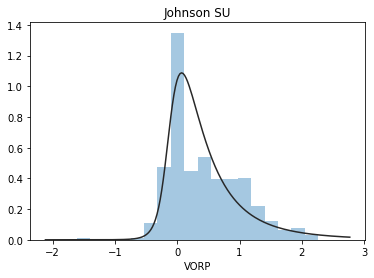

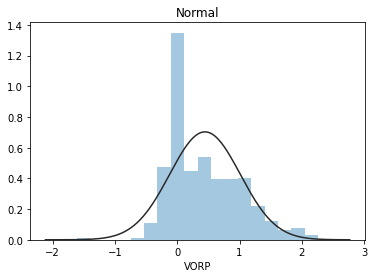

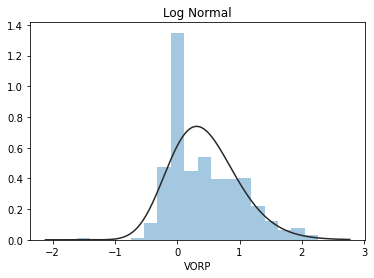

In [25]:
import scipy.stats as st
y = df['VORP']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm);

In [26]:
df[['name','VORP']].sort_values('VORP', ascending=False).head(20)

,name,VORP
191,Nikola Jokić,2.261763
118,Giannis Antetokounmpo,2.128232
12,Kawhi Leonard,2.091864
50,Anthony Davis,2.041220
26,Jimmy Butler,2.028148
55,Damian Lillard,1.987874
49,Isaiah Thomas,1.887070
13,Nikola Vučević,1.871802
349,Luka Dončić,1.856298
82,Draymond Green,1.840550


#### Distributions:

In [27]:
def distribs(df, a):
    f = pd.melt(df, value_vars=a)
    g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.histplot, 'value', kde=True);

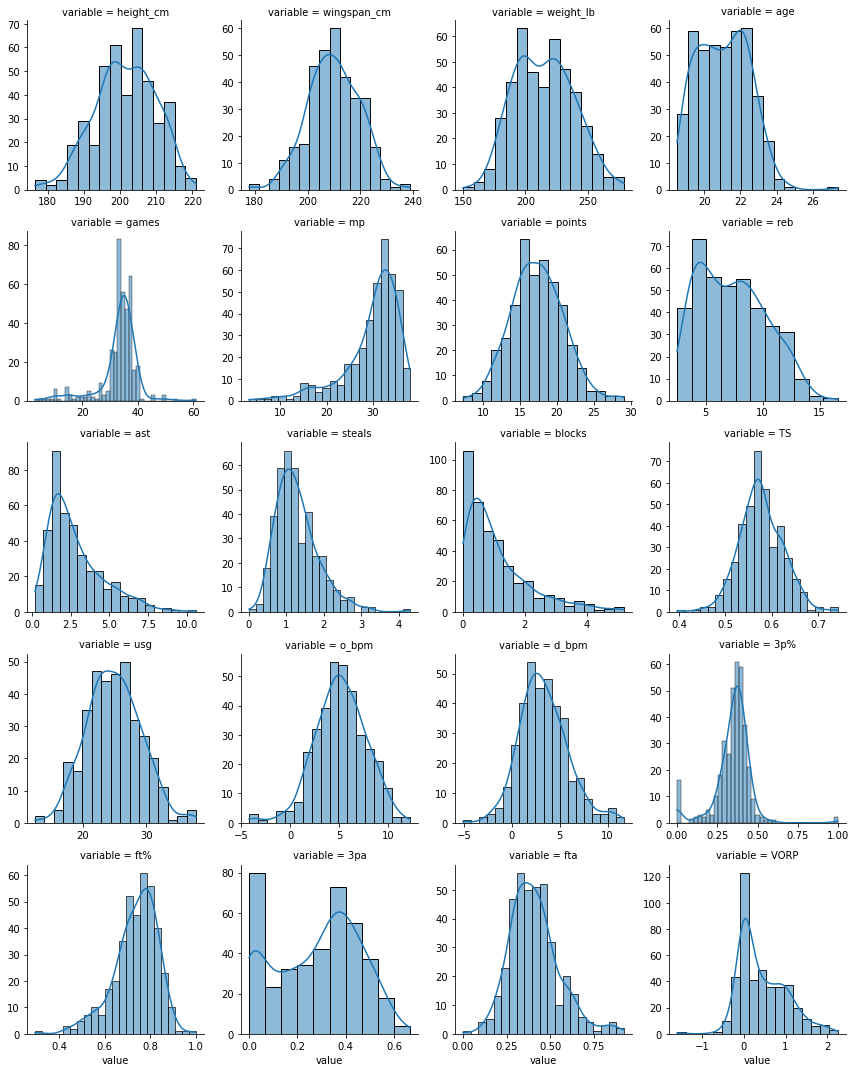

In [28]:
distribs(df,numerical)

Not all variables are normally distributed, we will work on this during feature engineering.

#### Correlations:

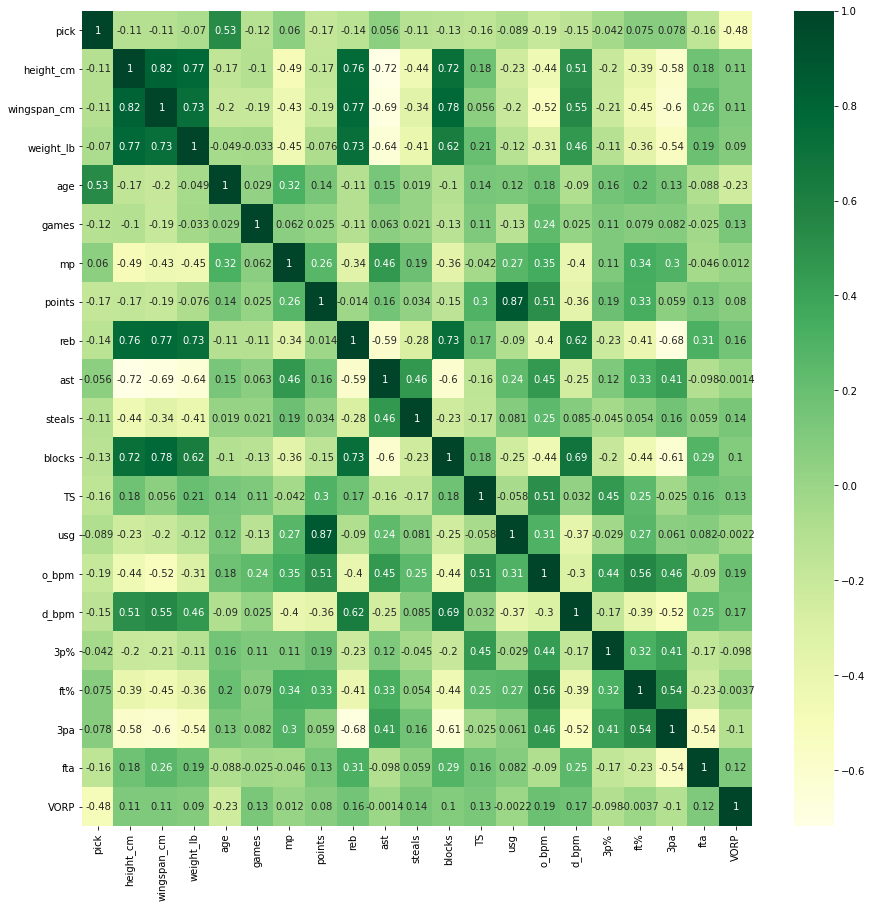

In [29]:
corr = df.corr(method='spearman')
plt.subplots(figsize=(15,15))
sns.heatmap(corr, cmap = 'YlGn', annot=True);

**Some observations:**
* **Physical Traits**: Height, wingspan and weight are very highly correlated with each other, this makes intuitive sense.
    * Furthermore, we see that these features show a high correlation with rebounds, blocks, and DBPM: while the first two seem fairly self-explanatory, the latter might have to do with high correlation between DBPM and rebounds/blocks.
    * On the flip side, the physical traits are negatively correlated with assists, steals, free throw %, 3-point attempts, OBPM and usage: Here, we see that in a lot of these negative correlations, weight has a lower intensity, this is probably due to examples like Giannis Antetokoumpo and Zion Williamson, who are great ball-handlers and use their weight to create plays.
    
* **Box Score Stats**: Points, rebounds, assists, blocks and steals.
    * Points scored are very strongly positively correlated with usage, which makes sense as a player with the ball in their hands more often will likely score more points. The same logic applies to assists and usage, despite the intensity being smaller.
    * 


### 2.1. Categorical varaibles:

In [30]:
# data corrections
df['c_year'] = np.where(df['c_year']=='2007','Freshman',df['c_year'])
df['position'] = np.where(df['position']=='C/','C',df['position'])

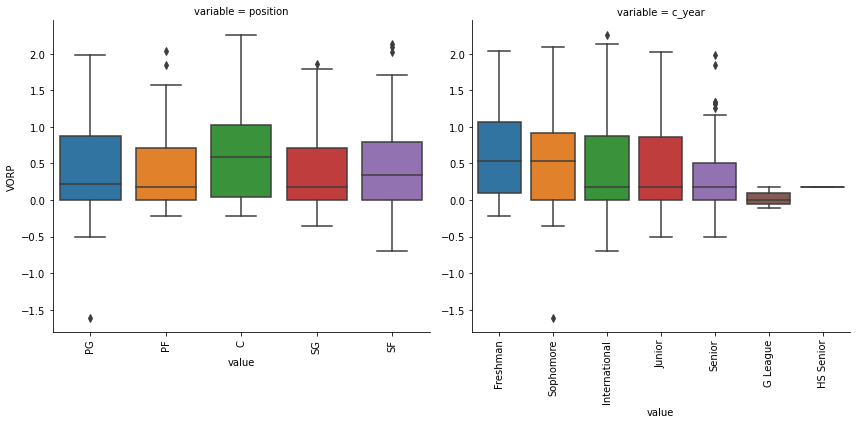

In [31]:
for c in category:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['VORP'], value_vars=category)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=6)
g = g.map(boxplot, "value", "VORP")

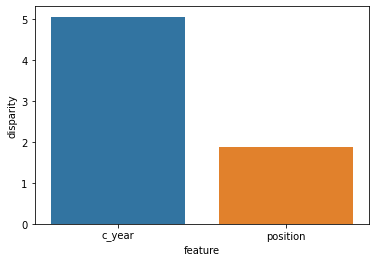

In [32]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = category
    pvals = []
    for c in category:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['VORP'].values
            samples.append(s)
        pval = st.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity');

The above is a quick (and rough) estimation of how much the feature impacts the target variable. The low impact of position is fine becuase we want to find the players that are projected to be valuable at every position. We will keep this variable as it helps provide context to other stats, as seen below:

In [33]:
df_vorp = df.corr(method='spearman')[['VORP']]
for i in df['position'].unique():
    df_vorp[i] = df[df['position']==i].corr(method='spearman')['VORP']

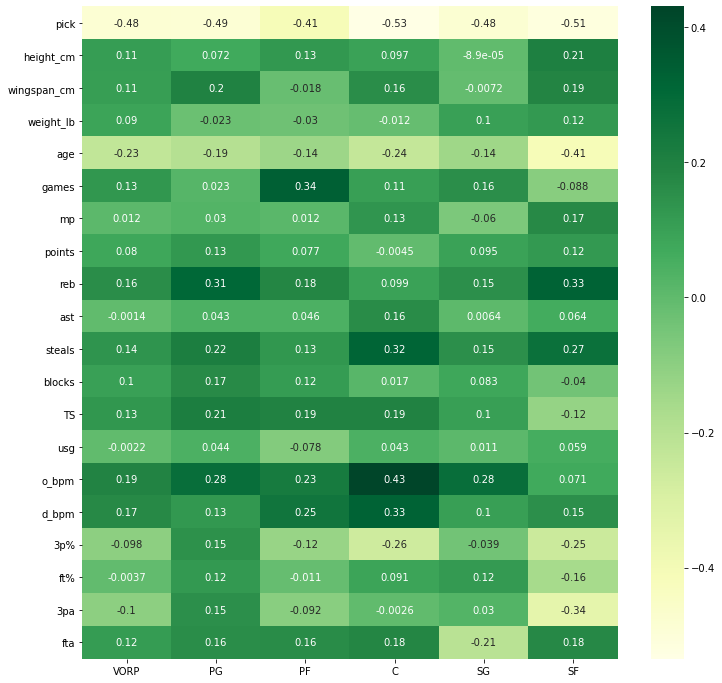

In [34]:
plt.subplots(figsize=(12,12))
sns.heatmap(df_vorp.drop(index='VORP'), cmap='YlGn', annot=True);

While the position variable itself does not impact VORP directly, the heatmap above shows us that it impacts the other variables and how they interact with VORP.

### 3. Feature Engineering:

##### 3.1 - Wingspan colinearity,

Earlier, we discussed how the physical traits are highly correlated with each other. Perhaps the biggest offender of this sort are the height and wingspan traits. However, instead of dropping one of the two - we will use some intuition to change the way we use the feature.

In [35]:
df['wingspan_cm'] = df['wingspan_cm'] - df['height_cm']

Here, we have simply used wingspan as a difference between the wingspan and the height. This is because players in all positions can create impact on the defensive end with wingspans higher than their heights, this also reduces the correlation between the two variables and shows a more meaningful relationship with defensive box +/-.

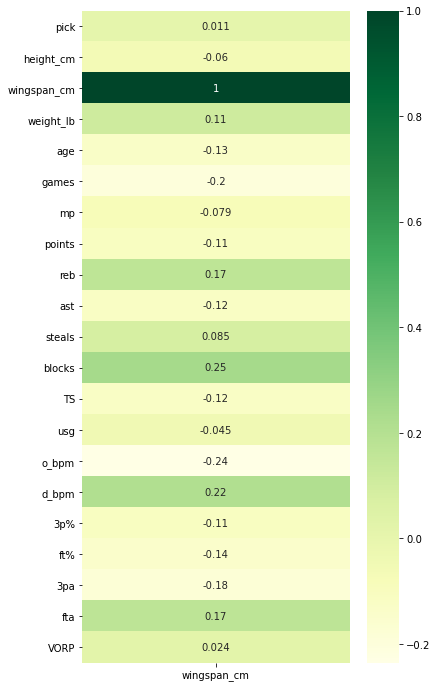

In [36]:
df_wingspan = df.drop(columns=[i for i in df.columns if 'position' in i or 'c_year' in i]).corr(method='spearman')
plt.subplots(figsize=(6,12))
sns.heatmap(df_wingspan[['wingspan_cm']], cmap='YlGn', annot=True);

##### 3.2 - Getting dummy variables for categorical variables.

In [37]:
df = pd.get_dummies(df.drop(columns='name'))
df

,pick,height_cm,wingspan_cm,weight_lb,age,games,mp,points,reb,ast,...,position_PG,position_SF,position_SG,c_year_Freshman,c_year_G League,c_year_HS Senior,c_year_International,c_year_Junior,c_year_Senior,c_year_Sophomore
0,1,191.8,1.2,191,19.2,11.0,27.5,22.8,4.4,5.6,...,1,0,0,1,0,0,0,0,0,0
1,2,205.1,12.1,248,20.1,38.0,30.0,23.4,9.9,1.4,...,0,0,0,0,0,0,0,0,0,1
2,3,211.5,5.7,259,19.1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
3,4,205.1,11.4,227,20.3,36.0,30.7,15.4,9.2,1.5,...,0,0,0,1,0,0,0,0,0,0
4,7,205.7,NaN,243,18.8,14.0,17.1,13.6,10.7,0.6,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,15,200.0,8.9,208,18.9,35.0,31.2,13.0,7.1,3.7,...,0,0,1,1,0,0,0,0,0,0
420,32,200.7,NaN,201,20.6,34.0,17.3,10.0,4.6,2.9,...,1,0,0,0,0,0,1,0,0,0
421,12,208.3,NaN,220,20.2,10.0,32.8,14.2,9.1,3.0,...,0,0,0,0,0,0,1,0,0,0
422,23,210.8,NaN,250,19.5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [38]:
# We will be dropping rows where 'games' is nan, because 
# these are the players who were drafted without playing any minutes at a high enough level to count.

df = df[~ df['games'].isnull()]

# the remaining players will have their ft and 3p percentages imputed with 0, as these players did not attempt a
# single freethrow or 3-pointer.

df['ft%'].fillna(0, inplace=True)
df['3p%'].fillna(0, inplace=True)

Let's have a look at the missing values at the end of this.

In [39]:
missing(df)

,Missing Ratio
wingspan_cm,17.336683
d_bpm,9.547739
o_bpm,9.547739
usg,9.547739


##### 3.3 - Missing value imputation.

In [40]:
df = df.reset_index(drop=True)

In [41]:
a = list(missing(df)['Missing Ratio'].index)

In [42]:
df[a]

,wingspan_cm,d_bpm,o_bpm,usg
0,1.2,3.5,10.8,26.4
1,12.1,2.6,9.2,28.9
2,11.4,7.2,3.9,22.4
3,NaN,NaN,NaN,NaN
4,8.9,0.5,5.4,27.0
...,...,...,...,...
393,3.8,-0.8,-4.2,36.5
394,8.9,2.9,1.3,21.0
395,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN


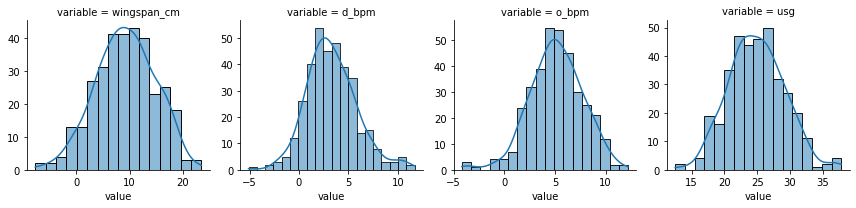

In [43]:
distribs(df,a)

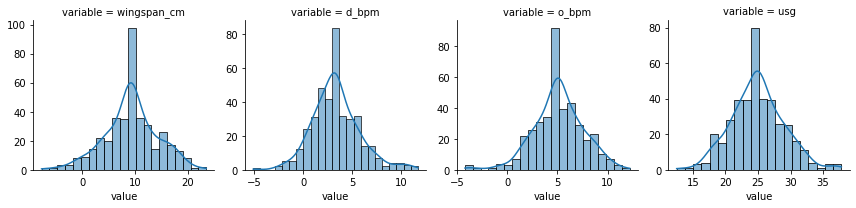

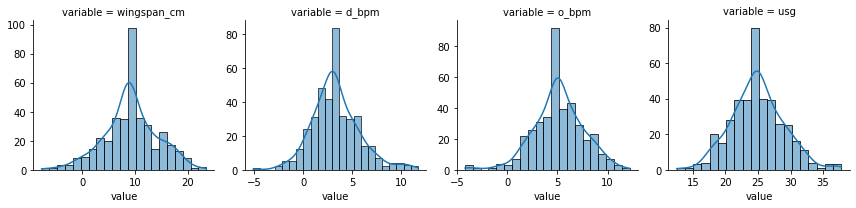

In [44]:
# we will try to impute using mean and median

from sklearn.impute import SimpleImputer

def impute(df, strat):
    imputer = SimpleImputer(strategy=strat)
    df_impute = deepcopy(df)
    imputer.fit(df_impute)
    X = imputer.transform(df_impute)
    df_imp = pd.DataFrame(X, columns = df_impute.columns)

    distribs(df_imp,a)
    
impute(df[a],'mean')
impute(df[a],'median')

These methods of imputation are not very robust, we see that the distributions are not representative of our data. To fight this, we will use regression to impute the missing values.

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import KFold
import joblib

def regr_impute(df):
    df1 = deepcopy(df)
#     df1 = deepcopy(df).drop(columns=['pick','VORP']) # for the final models, we don't use pick or VORP.
    a = list(missing(df)['Missing Ratio'].index)
    for i in a:
        c = [c for c in df1.columns if c not in a]
        X = df1[df1[i].notnull()].loc[:, c].values
        y = df1[df1[i].notnull()][i].values
        yy = df1[df1[i].isnull()][i].values


        np.random.seed(42)
        kf = KFold(n_splits=4)
        scores = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            clf = make_pipeline(RobustScaler(),LinearRegression())
            clf.fit(X_train, y_train)

        df_1 = df1[df1[i].notnull()]
        df_2 = df1[df1[i].isnull()]

        yy_pred = clf.predict(df1[df1[i].isnull()].loc[:, c].values)
#         joblib.dump(clf, f'{i}.pkl')
        
        df_2.loc[:,i] = yy_pred

        df1 = df_1.append(df_2)
    
    return df1

df1 = regr_impute(df)

In our first run of regression impute, create the models and save them to the local repository, and then use them in a second function meant to run the same process on a test dataset (that wouldn't contain the pick or the VORP variables).

In [46]:
def regr_impute2(df):
    df1 = deepcopy(df)
    try:
        df1.drop(columns=['pick'], inplace=True)
    except:
        pass
    try:
        df1.drop(columns=['VORP'], inplace=True)
    except:
        pass
    a = list(missing(df)['Missing Ratio'].index)
    for i in a:
#         a = list(missing(df1)['Missing Ratio'].index)
        c = [c for c in df1.columns if c not in a]
        X = df1[df1[i].notnull()].loc[:, c].values
        y = df1[df1[i].notnull()][i].values
        yy = df1[df1[i].isnull()][i].values
        
        model = joblib.load(f'{i}.pkl')
        df_1 = df1[df1[i].notnull()]
        df_2 = df1[df1[i].isnull()]

        yy_pred = model.predict(df1[df1[i].isnull()].loc[:, c].values)        
        df_2.loc[:,i] = yy_pred

        df1 = df_1.append(df_2)
    
    return df1

We then run the distributions on these missing features and see that this method of imputation maintains the distribution to a much larger extent than simple imputation.

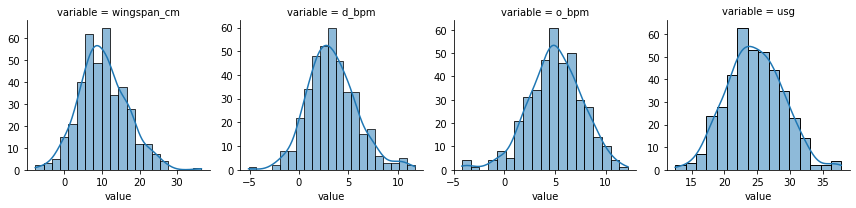

In [47]:
a = list(missing(df)['Missing Ratio'].index)
distribs(df1,a)

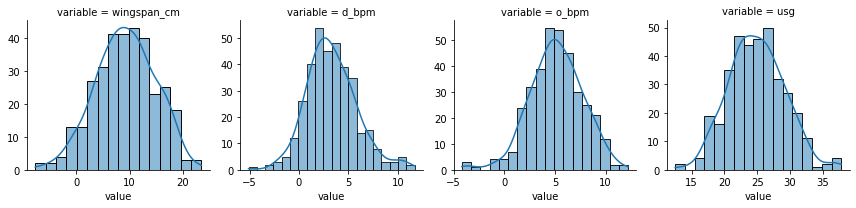

In [48]:
distribs(df,a)

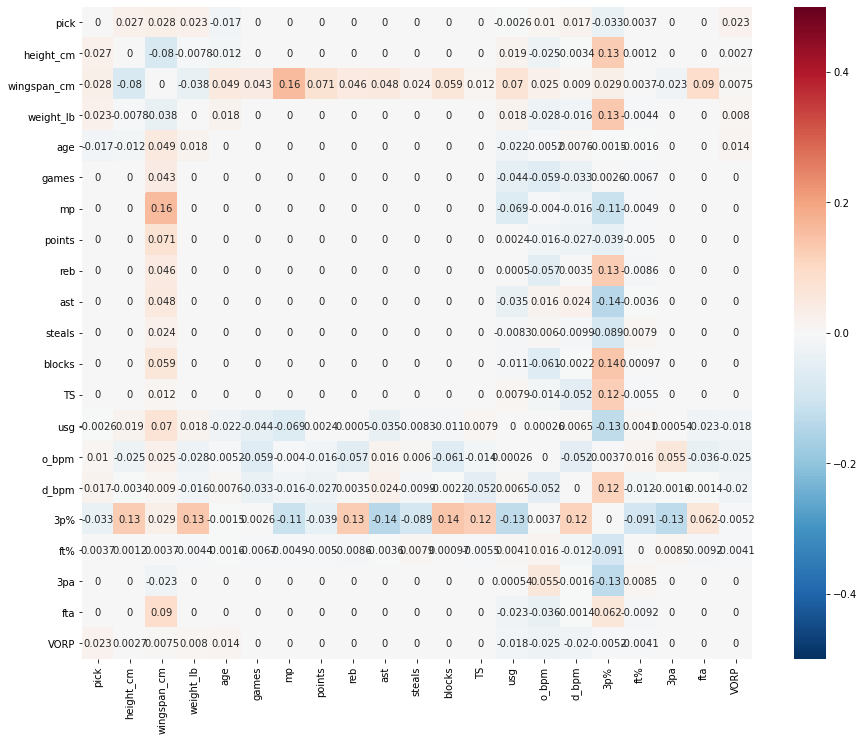

In [49]:
plt.subplots(figsize=(15,12))
sns.heatmap(df_wingspan - df1.drop(columns=[i for i in df1.columns if 'position' in i or 'c_year' in i]).corr(method='spearman'), cmap='RdBu_r', vmin=-0.5, vmax=0.5, annot=True);

Just to make sure that the values that have been imputed through regression are in line with the rest of our data, we check for the change in correlations caused by the imputation. As we see, only one feature has had its correlation increased by more than 10% (wingspan - minutes played), this is fine for now as neither of these are highly correlated with VORP - ~2% and ~1%, respectively. We also make sure that there are no more missing values.

In [50]:
missing(df1)

,Missing Ratio


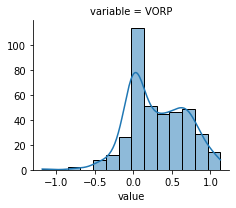

In [51]:
distribs(np.log1p(df1[['VORP']]),['VORP'])

##### 3.4 - Final transformation function for ease of repetition.

In [52]:
def final_transformation(df):
    df_n = deepcopy(df)
    # data corrections
    df_n.drop(columns=['name'],inplace=True)
    df_n['c_year'] = np.where(df_n['c_year']=='2007','Freshman',df_n['c_year'])
    df_n['position'] = np.where(df_n['position']=='C/','C',df_n['position'])
    df_n['wingspan_cm'] = df_n['wingspan_cm'] - df_n['height_cm']
    numerical = [i for i in df_n.columns if df_n.dtypes[i] != 'object']
    
    #one-hot-encoding
    df_n = pd.get_dummies(df_n)
    
    #missing value imputation
    df_n = df_n[df_n['games'].notnull()]
    df_n['ft%'].fillna(0, inplace=True)
    df_n['3p%'].fillna(0, inplace=True)
    df_n['c_year_HS Senior'] = 0
    a = list(missing(df_n)['Missing Ratio'].index)
    if 'VORP' in df_n.columns:
        df_n = regr_impute(df_n)
    else:
        df_n = regr_impute2(df_n)
    df_n.drop('c_year_HS Senior', axis=1, inplace=True)   
    
    df_n = df_n.reset_index()
    df_n = df_n.sort_values('index').reset_index(drop=True).drop('index',axis=1)
        
    return df_n

In [53]:
df1 = final_transformation(df_copy)

### 4. Model selection and hyperparameter tuning:

In [54]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
import lightgbm as lgb

First, we split the data.

In [55]:
X = df1.drop(columns = ['pick','VORP'])
y = df1['VORP']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

We also create a function to test the model using various parameters.

These are,
1. Mean absolute error - on the test data.
2. Root of mean squared error - on the test data.
3. Cross-validated RMSE - using validation sets.

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def error_scores(model):
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    print('MAE: ',mean_absolute_error(y_test, y),'| RMSE: ',np.sqrt(mean_squared_error(y_test, y)))
    print('Cross-val score: ',rmsle_cv(model).mean())
    

We try different models to see which one performs the best.

In [57]:
lin = make_pipeline(StandardScaler(),LinearRegression())
error_scores(lin)

MAE:  0.40260320607254363 | RMSE:  0.5059411773222948
Cross-val score:  0.5283919001712588


In [58]:
rf = RandomForestRegressor(n_estimators=100, )
error_scores(rf)

MAE:  0.40740294362753654 | RMSE:  0.4960376089025043
Cross-val score:  0.5433282322757578


In [59]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
X = df1[list(feature_scores[:12].index)]
y = df1['VORP']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [60]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.05, random_state=3))
error_scores(lasso)

MAE:  0.4153475704196225 | RMSE:  0.4906825868084104
Cross-val score:  0.5287984443370425


In [61]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.05, l1_ratio=0.5, random_state=3))
error_scores(ENet)

MAE:  0.41102929107895925 | RMSE:  0.4936681717685558
Cross-val score:  0.5152542975696213


In [62]:
KRR = KernelRidge(alpha=5, kernel='polynomial', degree=1.5, coef0=2.5)
error_scores(KRR)

MAE:  0.40487710624691375 | RMSE:  0.49848222223531974
Cross-val score:  0.5224330037964978


In [63]:
GBoost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.04,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=20, min_samples_split=10, 
                                   loss='huber', random_state =5)

error_scores(GBoost)

MAE:  0.40108325576363646 | RMSE:  0.4866213378387808
Cross-val score:  0.5195175216930984


In [64]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=50,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

error_scores(model_xgb)

MAE:  0.39888685498066506 | RMSE:  0.4750019625998855
Cross-val score:  0.5370362254981951


In [65]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=3,
                              learning_rate=0.06, n_estimators=50,
                              max_bin = 55)

error_scores(model_lgb)

MAE:  0.3965520130695813 | RMSE:  0.4707467252760422
Cross-val score:  0.5257619595787162


In [66]:
from sklearn.svm import SVR

model_svm = SVR(kernel="poly", degree=2, C=100, epsilon=0.5)
error_scores(model_svm)

MAE:  0.4114834711249804 | RMSE:  0.4934724047082808
Cross-val score:  0.5130339594947284


In [67]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [68]:
averaged_models = AveragingModels(models = (GBoost, model_lgb, model_svm))

error_scores(averaged_models)

MAE:  0.39767346314364116 | RMSE:  0.47483162336849
Cross-val score:  0.5122368943076938


In [69]:
from data_collection_module.tankathon_scraper import TankathonScrape

In [70]:
t_obj = TankathonScrape()
t_obj.scrape_link("http://www.tankathon.com/past_drafts/2021")

starting player1..
done
starting player2..
done
starting player3..
done
starting player4..
done
starting player5..
done
starting player6..
done
starting player7..
done
starting player8..
done
starting player9..
done
starting player10..
done
starting player11..
done
starting player12..
done
starting player13..
done
starting player14..
done
starting player15..
done
starting player16..
done
starting player17..
done
starting player18..
done
starting player19..
done
starting player20..
done
starting player21..
done
starting player22..
done
starting player23..
done
starting player24..
done
starting player25..
done
starting player26..
done
starting player27..
done
starting player28..
done
starting player29..
done
starting player30..
done
starting player31..
done
starting player32..
done
starting player33..
done
starting player34..
done
starting player35..
done
starting player36..
done
starting player37..
done
starting player38..
done
starting player39..
done
starting player40..
done
starting 

In [71]:
draft_results = deepcopy(t_obj.df[['name','pick']])
# draft_results.to_csv('2021_draft.csv', index=False)

In [72]:
# we save and reload the frame as this automatically does some data conversions and also doubles in documenting the csv.

# df_test.to_csv('test.csv', index = False) #commented out due to changes on tankathon.
df_test = pd.read_csv('test.csv')
df_test

,name,position,pick,height_cm,wingspan_cm,weight_lb,c_year,age,games,mp,...,steals,blocks,TS,usg,o_bpm,d_bpm,3p%,ft%,3pa,fta
0,Evan Mobley,C,1,213.4,NaN,215,Freshman,20.1,33,33.9,...,0.8,3.1,0.624,22.8,7.9,5.8,0.300,0.694,0.117,0.566
1,Jalen Suggs,PG,2,193.0,NaN,205,Freshman,20.1,30,28.9,...,2.4,0.4,0.595,24.8,4.8,4.6,0.337,0.754,0.338,0.370
2,Cade Cunningham,PG,3,200.7,NaN,220,Freshman,19.8,27,35.4,...,1.6,0.8,0.574,29.1,5.1,3.2,0.400,0.846,0.388,0.390
3,Jalen Green,SG,4,198.1,NaN,178,G League,19.5,15,32.0,...,1.7,0.3,0.610,NaN,NaN,NaN,0.365,0.829,0.417,0.172
4,Alperen Şengün,C,5,208.3,NaN,240,International,19.0,37,28.2,...,1.7,2.0,0.685,NaN,NaN,NaN,0.200,0.794,0.088,0.612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,David Duke,SG,70,196.8,205.1,204,Junior,21.8,26,37.1,...,1.2,0.3,0.508,27.3,3.5,1.7,0.389,0.792,0.352,0.336
70,Trendon Watford,SF,71,205.1,219.1,237,Sophomore,20.7,28,34.6,...,1.2,0.6,0.536,24.6,4.2,0.9,0.316,0.651,0.161,0.429
71,AJ Lawson,SG,72,198.1,208.3,178,Junior,21.0,21,31.3,...,1.8,0.2,0.521,25.2,4.7,0.8,0.351,0.700,0.566,0.269
72,Romeo Weems,SF,73,200.7,NaN,215,Sophomore,20.2,18,28.6,...,1.6,0.8,0.455,17.6,-2.3,2.7,0.366,0.696,0.308,0.173


In [73]:
missing(df_test)

,Missing Ratio
wingspan_cm,27.027027
d_bpm,16.216216
o_bpm,16.216216
usg,16.216216
3p%,1.351351


In [74]:
df_test_formatted = final_transformation(df_test)

In [75]:
missing(df_test_formatted)

,Missing Ratio


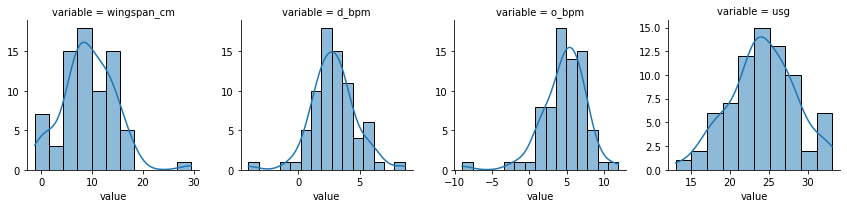

In [76]:
distribs(df_test_formatted, a)

In [77]:
y = averaged_models.predict(df_test_formatted[list(feature_scores[:12].index)])

In [78]:
df_test['xVORP'] = np.expm1(y)

In [79]:
df_test[['name','position','xVORP']].sort_values('xVORP', ascending=False).head(60)

,name,position,xVORP
4,Alperen Şengün,C,2.502603
0,Evan Mobley,C,1.698120
2,Cade Cunningham,PG,1.081640
6,Jalen Johnson,SF,1.011586
3,Jalen Green,SG,1.002528
23,Quentin Grimes,SG,0.982408
8,Franz Wagner,SF,0.852869
5,Scottie Barnes,PF,0.835136
32,Miles McBride,PG,0.825384
58,Charles Bassey,C,0.823317


In [80]:
tn_obj = TankathonScrape()
tn_obj.scrape_link("http://www.tankathon.com/past_drafts/2018")

starting player1..
done
starting player2..
done
starting player3..
done
starting player4..
done
starting player5..
done
starting player6..
done
starting player7..
done
starting player8..
done
starting player9..
done
starting player10..
done
starting player11..
done
starting player12..
done
starting player13..
done
starting player14..
done
starting player15..
done
starting player16..
done
starting player17..
done
starting player18..
done
starting player19..
done
starting player20..
done
starting player21..
done
starting player22..
done
starting player23..
done
starting player24..
done
starting player25..
done
starting player26..
done
starting player27..
done
starting player28..
done
starting player29..
done
starting player30..
done
starting player31..
done
starting player32..
done
starting player33..
done
starting player34..
done
starting player35..
done
starting player36..
done
starting player37..
done
starting player38..
done
starting player39..
done
starting player40..
done
starting 

In [81]:
df_test_2019 = tn_obj.df

In [82]:
df_test_2019.to_csv('test_2019.csv', index=False)
df_test_2019 = pd.read_csv('test_2019.csv')

In [83]:
missing(df_test_2019)

,Missing Ratio
d_bpm,15.000000
o_bpm,15.000000
usg,15.000000
wingspan_cm,11.666667
ft%,8.333333
fta,6.666667
3pa,6.666667
3p%,6.666667
TS,6.666667
blocks,6.666667


In [84]:
df_2019 = final_transformation(df_test_2019)

In [85]:
y = averaged_models.predict(df_2019[list(feature_scores[:12].index)])

In [86]:
df_2019['xVORP'] = np.expm1(y)

In [87]:
df_19 = df_test_2019.merge(df_2019[['height_cm','weight_lb','age','xVORP']], how='left', on=['height_cm','weight_lb','age'])

In [88]:
df_19[['name','position','xVORP']].sort_values('xVORP', ascending=False).reset_index()

,index,name,position,xVORP
0,2,Luka Dončić,SG,2.195282
1,9,Mikal Bridges,SG,1.631388
2,0,DeAndre Ayton,C,1.468688
3,4,Trae Young,PG,1.211549
4,3,Jaren Jackson Jr.,PF,1.210272
5,1,Marvin Bagley,PF,1.184858
6,6,Wendell Carter,PF,1.181176
7,5,Mohamed Bamba,C,1.072048
8,10,Shai Gilgeous-Alexander,PG,0.767085
9,55,Ray Spalding,PF,0.762411


#### Part 2: Classification - Player Archetypes

In [89]:
train = pd.read_csv('data/classification_train.csv')
arch = pd.read_csv('data/NBA Data 1980-2019.csv')
arch = arch[arch['Year']>2010][['Player','Archetype']]
arch = arch.groupby(['Player'], as_index=False)[['Archetype']].agg(lambda x:x.value_counts().index[0])
train = train.merge(arch, on='Player').drop_duplicates(subset='name')
train

,name,position,pick,height_cm,wingspan_cm,weight_lb,c_year,age,games,mp,...,usg,o_bpm,d_bpm,3p%,ft%,3pa,fta,Player,VORP,Archetype
0,Kyrie Irving,PG,1,191.8,193.0,191,Freshman,19.2,11.0,27.5,...,26.4,10.8,3.5,0.462,0.901,0.375,0.683,Kyrie Irving,5.1,Superstar
1,Derrick Williams,PF,2,205.1,217.2,248,Sophomore,20.1,38.0,30.0,...,28.9,9.2,2.6,0.568,0.746,0.195,0.871,Derrick Williams,0.8,Sharpshooter
2,Enes Kanter,C,3,211.5,217.2,259,Freshman,19.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enes Kanter,1.9,All Star Post Scorer
3,Tristan Thompson,PF,4,205.1,216.5,227,Freshman,20.3,36.0,30.7,...,22.4,3.9,7.2,NaN,0.487,0.000,0.829,Tristan Thompson,1.2,Rim Protector
4,Bismack Biyombo,C,7,205.7,NaN,243,International,18.8,14.0,17.1,...,NaN,NaN,NaN,NaN,0.553,0.000,0.810,Bismack Biyombo,0.8,Rim Protector
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,O.G. Anunoby,SF,23,202.6,219.1,232,Sophomore,19.9,16.0,25.1,...,20.8,5.4,4.7,0.311,0.562,0.369,0.393,OG Anunoby,1.7,Sharpshooter
386,DeAndre Ayton,C,1,215.9,226.1,250,Freshman,19.9,35.0,33.5,...,26.6,6.8,4.0,0.343,0.733,0.078,0.424,Deandre Ayton,1.6,All Star Post Scorer
387,Tomáš Satoranský,PG,32,200.7,NaN,201,International,20.6,34.0,17.3,...,NaN,NaN,NaN,0.273,0.705,0.314,0.314,Tomáš Satoranský,1.3,Playmaker
388,Dario Šarić,PF,12,208.3,NaN,220,International,20.2,10.0,32.8,...,NaN,NaN,NaN,0.308,0.781,0.126,0.311,Dario Šarić,1.9,All Star Sharpshooter


In [90]:
train_new = final_transformation(train.drop(columns=['Player','VORP','Archetype']))
train_new

,height_cm,wingspan_cm,weight_lb,age,games,mp,points,reb,ast,steals,...,position_PF,position_PG,position_SF,position_SG,c_year_Freshman,c_year_G League,c_year_International,c_year_Junior,c_year_Senior,c_year_Sophomore
0,191.8,1.200000,191,19.2,11.0,27.5,22.8,4.4,5.6,1.9,...,0,1,0,0,1,0,0,0,0,0
1,205.1,12.100000,248,20.1,38.0,30.0,23.4,9.9,1.4,1.2,...,1,0,0,0,0,0,0,0,0,1
2,205.1,11.400000,227,20.3,36.0,30.7,15.4,9.2,1.5,1.1,...,1,0,0,0,1,0,0,0,0,0
3,205.7,35.785624,243,18.8,14.0,17.1,13.6,10.7,0.6,0.8,...,0,0,0,0,0,0,1,0,0,0
4,191.1,8.900000,177,19.5,38.0,35.9,17.4,4.0,4.2,0.7,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,207.6,3.200000,222,20.1,35.0,29.9,19.5,9.9,2.9,0.8,...,1,0,0,0,1,0,0,0,0,0
363,202.6,16.500000,232,19.9,16.0,25.1,15.9,7.8,2.1,1.9,...,0,0,1,0,0,0,0,0,0,1
364,215.9,10.200000,250,19.9,35.0,33.5,21.6,12.4,1.8,0.6,...,0,0,0,0,1,0,0,0,0,0
365,200.7,17.540334,201,20.6,34.0,17.3,10.0,4.6,2.9,1.2,...,0,1,0,0,0,0,1,0,0,0


In [91]:
train_new['Archetype'] = train[train['games'].notnull()].reset_index()['Archetype']

In [92]:
train_new

,height_cm,wingspan_cm,weight_lb,age,games,mp,points,reb,ast,steals,...,position_PG,position_SF,position_SG,c_year_Freshman,c_year_G League,c_year_International,c_year_Junior,c_year_Senior,c_year_Sophomore,Archetype
0,191.8,1.200000,191,19.2,11.0,27.5,22.8,4.4,5.6,1.9,...,1,0,0,1,0,0,0,0,0,Superstar
1,205.1,12.100000,248,20.1,38.0,30.0,23.4,9.9,1.4,1.2,...,0,0,0,0,0,0,0,0,1,Sharpshooter
2,205.1,11.400000,227,20.3,36.0,30.7,15.4,9.2,1.5,1.1,...,0,0,0,1,0,0,0,0,0,Rim Protector
3,205.7,35.785624,243,18.8,14.0,17.1,13.6,10.7,0.6,0.8,...,0,0,0,0,0,1,0,0,0,Rim Protector
4,191.1,8.900000,177,19.5,38.0,35.9,17.4,4.0,4.2,0.7,...,1,0,0,1,0,0,0,0,0,All Star Sharpshooter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,207.6,3.200000,222,20.1,35.0,29.9,19.5,9.9,2.9,0.8,...,0,0,0,1,0,0,0,0,0,Ignorance
363,202.6,16.500000,232,19.9,16.0,25.1,15.9,7.8,2.1,1.9,...,0,1,0,0,0,0,0,0,1,Sharpshooter
364,215.9,10.200000,250,19.9,35.0,33.5,21.6,12.4,1.8,0.6,...,0,0,0,1,0,0,0,0,0,All Star Post Scorer
365,200.7,17.540334,201,20.6,34.0,17.3,10.0,4.6,2.9,1.2,...,1,0,0,0,0,1,0,0,0,Playmaker


In [93]:
X = train_new.drop('Archetype', axis=1)
y = train_new[['Archetype']]

In [94]:
from sklearn.preprocessing import OrdinalEncoder

In [95]:
enc = OrdinalEncoder()
y_new = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,y_new,test_size=0.2,random_state=41)

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier()

In [97]:
rf2.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def err_score(model):
    predict= model.predict(X_test)
    print(confusion_matrix(y_test, predict))
    print('\n')
    print(classification_report(y_test, predict))
    print('\n')
    print(accuracy_score(y_test, predict))
     
err_score(rf2)

[[ 0  0  0  0  2  0  1  0  0  0]
 [ 0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  1 10  0  0  0  0  0]
 [ 0  1  0  1 22  0  1  0  1  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  9  0  1  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  1 11  0  0  0  2  0]
 [ 0  0  0  0  2  0  0  0  1  0]]


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         2
         3.0       0.33      0.09      0.14        11
         4.0       0.35      0.85      0.50        26
         5.0       0.00      0.00      0.00         2
         6.0       0.33      0.10      0.15        10
         7.0       0.00      0.00      0.00         1
         8.0       0.50      0.14      0.22        14
         9.0       0.00      0.00      0.00         3

    accuracy                           0.35        74
   macro avg     

In [99]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
err_score(rfc)

[[ 0  0  0  0  1  0  1  1  0  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  2  0]
 [ 0  0  0  0 24  0  1  0  1  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  9  0  1  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  1  0]
 [ 0  0  0  0  2  0  0  0  1  0]]


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00        11
         4.0       0.38      0.92      0.53        26
         5.0       0.00      0.00      0.00         2
         6.0       0.33      0.10      0.15        10
         7.0       0.00      0.00      0.00         1
         8.0       0.20      0.07      0.11        14
         9.0       0.00      0.00      0.00         3

    accuracy                           0.35        74
   macro avg     

In [100]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, y_train); 

err_score(KNN_Classifier)

[[ 0  0  0  0  2  0  1  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  1 10  0  0  0  0  0]
 [ 0  2  0  4 16  0  2  0  2  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  0  1  1  8  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 0  1  0  2  9  0  2  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0]]


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         2
         3.0       0.11      0.09      0.10        11
         4.0       0.30      0.62      0.40        26
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00        10
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00        14
         9.0       0.00      0.00      0.00         3

    accuracy                           0.23        74
   macro avg     

In [101]:
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, y_train);

err_score(LGR_Classifier)

[[ 0  0  0  0  1  0  2  0  0  0]
 [ 0  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  1  7  0  1  0  2  0]
 [ 0  0  0  2 21  0  1  0  2  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  0  1  0  8  0  1  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  1 11  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  2  0]]


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         2
         3.0       0.20      0.09      0.13        11
         4.0       0.39      0.81      0.53        26
         5.0       0.00      0.00      0.00         2
         6.0       0.20      0.10      0.13        10
         7.0       0.00      0.00      0.00         1
         8.0       0.22      0.14      0.17        14
         9.0       0.00      0.00      0.00         3

    accuracy                           0.34        74
   macro avg     

In [102]:
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train)

err_score(BNB_Classifier)

[[ 0  0  0  0  1  0  2  0  0  0]
 [ 0  0  0  1  0  0  0  0  1  0]
 [ 0  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  9  0  0  0  2  0]
 [ 0  0  0  3 16  0  1  0  6  0]
 [ 0  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  7  0  1  2  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  2  9  0  0  0  3  0]
 [ 0  0  0  1  2  0  0  0  0  0]]


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00        11
         4.0       0.35      0.62      0.44        26
         5.0       0.00      0.00      0.00         2
         6.0       0.25      0.10      0.14        10
         7.0       0.00      0.00      0.00         1
         8.0       0.20      0.21      0.21        14
         9.0       0.00      0.00      0.00         3

    accuracy                           0.27        74
   macro avg     

In [103]:
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, y_train);

err_score(DTC_Classifier)

[[0 0 0 0 2 0 0 1 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 3 6 0 1 0 1 0]
 [1 1 0 6 9 1 0 0 8 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 1 0 4 0 0 3 2 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 1 1 2 1 1 0 8 0]
 [0 0 0 1 1 0 0 0 1 0]]


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         2
         3.0       0.23      0.27      0.25        11
         4.0       0.33      0.35      0.34        26
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00        10
         7.0       0.00      0.00      0.00         1
         8.0       0.40      0.57      0.47        14
         9.0       0.00      0.00      0.00         3

    accuracy                           0.27        74
   macro avg       0.10      0.12      0.11        74
weighted avg       0.23      0.27      0.25        74



0.2702

In [104]:
df_test['predicted_archetype'] = LGR_Classifier.predict(df_test_formatted)
df_test['predicted_archetype'] = enc.inverse_transform(df_test[['predicted_archetype']])

In [105]:
df_test[['name','xVORP','predicted_archetype']].sort_values('xVORP',ascending=False).head(60)

,name,xVORP,predicted_archetype
4,Alperen Şengün,2.502603,All Star Post Scorer
0,Evan Mobley,1.698120,All Star Sharpshooter
2,Cade Cunningham,1.081640,All Star Sharpshooter
6,Jalen Johnson,1.011586,All Star Sharpshooter
3,Jalen Green,1.002528,All Star Sharpshooter
23,Quentin Grimes,0.982408,Ignorance
8,Franz Wagner,0.852869,Ignorance
5,Scottie Barnes,0.835136,Ignorance
32,Miles McBride,0.825384,Sharpshooter
58,Charles Bassey,0.823317,Ignorance


In [106]:
df_test.rename(columns={'pick':'projected_pick'}).merge(draft_results, on='name').to_csv('final.csv')

It seems that none of the classification algorithms have a good score, so we might avoid that for now. However, the rest of data is ready to be analysed, most of the analysis will be done using tableau.